In [186]:
# Import required modules and packages 

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from pathlib import Path
import urllib.request
import numpy as np
import pandas as pd

import xarray as xr

import sqlite3
import datetime

In [187]:
# Ref https://docs.python.org/3/library/sqlite3.html'

input_filename = "Resources/data.sqlite"
conn = sqlite3.connect(input_filename)
query = '''
    SELECT * FROM Fires;
'''
us_wild_fire_df = pd.read_sql_query(query, conn)
us_wild_fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 39 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   OBJECTID                       int64  
 1   Shape                          object 
 2   FOD_ID                         int64  
 3   FPA_ID                         object 
 4   SOURCE_SYSTEM_TYPE             object 
 5   SOURCE_SYSTEM                  object 
 6   NWCG_REPORTING_AGENCY          object 
 7   NWCG_REPORTING_UNIT_ID         object 
 8   NWCG_REPORTING_UNIT_NAME       object 
 9   SOURCE_REPORTING_UNIT          object 
 10  SOURCE_REPORTING_UNIT_NAME     object 
 11  LOCAL_FIRE_REPORT_ID           object 
 12  LOCAL_INCIDENT_ID              object 
 13  FIRE_CODE                      object 
 14  FIRE_NAME                      object 
 15  ICS_209_PLUS_INCIDENT_JOIN_ID  object 
 16  ICS_209_PLUS_COMPLEX_JOIN_ID   object 
 17  MTBS_ID                        object 
 18  MT

## Cleaning up the dataframe

In [188]:
# # Retain only required columns=['FOD_ID','SOURCE_SYSTEM_TYPE','FIRE_NAME''FIRE_YEAR','DISCOVERY_DATE',
#                                 'NWCG_CAUSE_CLASSIFICATION','NWCG_GENERAL_CAUSE', 'CONT_DATE',
#                                 'FIRE_SIZE','FIRE_SIZE_CLASS','LATITUDE','LONGITUDE','STATE'])

# # Drop columns based on column index.
us_wild_fire_df = us_wild_fire_df.drop(us_wild_fire_df.columns[[0,1,3,5,6,7,8,9,10,11,12,13,
                                                15,16,17,18,19,22,23,26,28,29,34,36,37,38 ]],axis = 1)
# print(us_wild_fire_df.info())   
print(f'Total records before NA is : {len(us_wild_fire_df.index)}')
# For this analysis consdering only the records that contains all data for these 18 columns. Drop null value columns to avoid biased analysis

us_wild_fire_df.dropna(inplace=True)
# df = df[(df.rebounds != 11) & (df.points != 31)]
remove_rows_list = ['Missing data','not specified', 'undetermined', 'Missing data/not specified/undetermined']
us_wild_fire_df = us_wild_fire_df[us_wild_fire_df.NWCG_CAUSE_CLASSIFICATION.isin(remove_rows_list)==False]
# us_wild_fire_df = us_wild_fire_df[us_wild_fire_df.NWCG_GENERAL_CAUSE.isin(remove_rows_list)==False]

us_wild_fire_df['FIRE_START_MONTH'] = pd.to_datetime(us_wild_fire_df['DISCOVERY_DATE'], format='%m/%d/%Y').dt.strftime('%b')

# print(us_wild_fire_df.info())
print(f'Total records after NA is : {len(us_wild_fire_df.index)}')                          
us_wild_fire_df.head()                             

Total records before NA is : 2303566
Total records after NA is : 2110225


,FOD_ID,SOURCE_SYSTEM_TYPE,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIRE_START_MONTH
0,1,FED,FOUNTAIN,2005,2/2/2005,Human,Power generation/transmission/distribution,2/2/2005,0.10,A,40.036944,-121.005833,CA,Feb
1,2,FED,PIGEON,2004,5/12/2004,Natural,Natural,5/12/2004,0.25,A,38.933056,-120.404444,CA,May
2,3,FED,SLACK,2004,5/31/2004,Human,Debris and open burning,5/31/2004,0.10,A,38.984167,-120.735556,CA,May
3,4,FED,DEER,2004,6/28/2004,Natural,Natural,7/3/2004,0.10,A,38.559167,-119.913333,CA,Jun
4,5,FED,STEVENOT,2004,6/28/2004,Natural,Natural,7/3/2004,0.10,A,38.559167,-119.933056,CA,Jun


<Axes: xlabel='FIRE_YEAR'>

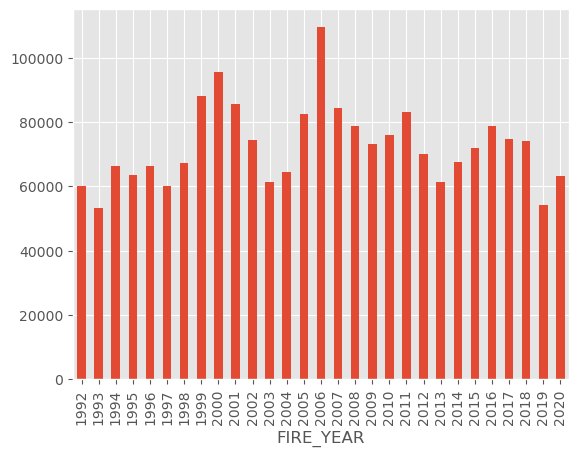

In [189]:
#Ref: https://www.geeksforgeeks.org/plot-the-size-of-each-group-in-a-groupby-object-in-pandas/
# Need the count of fire by each year to display a barchart

us_wild_fire_df.groupby(['FIRE_YEAR']).size().plot(kind='bar')

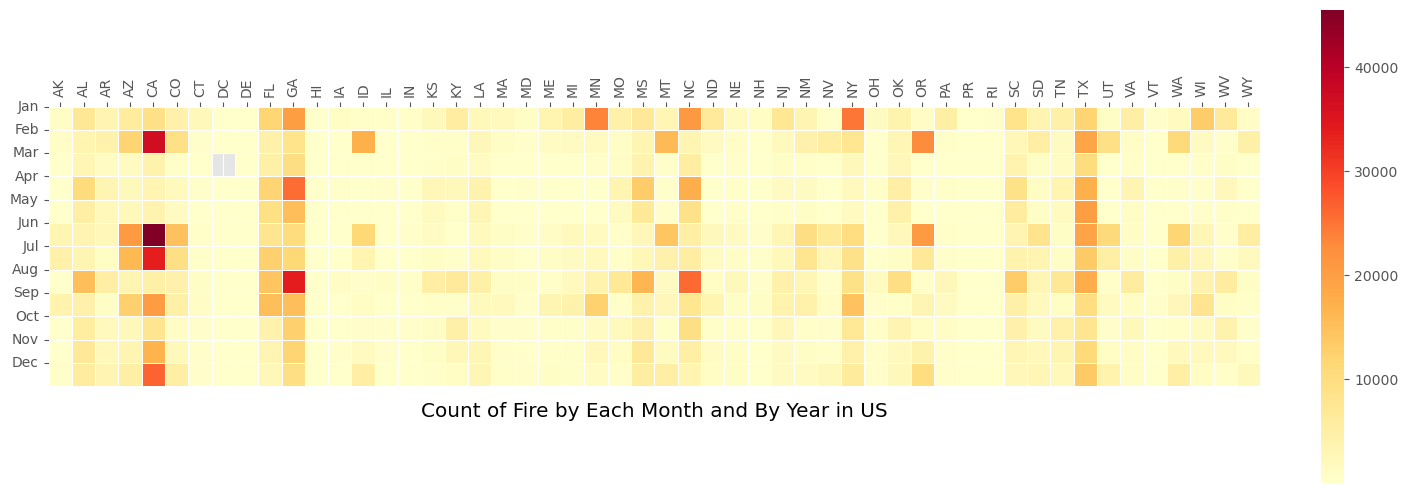

In [190]:
# Need the count of fire by each month and by each state to display a heat map to see which month and which state has highest fire
# https://www.geeksforgeeks.org/pandas-groupby-unstack/
wild_fire_by_month = us_wild_fire_df.groupby(['FIRE_START_MONTH', 'STATE']).size().unstack()
yaxis_labelvalue = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# plot the result
fig, ax = plt.subplots(figsize=(14, 6),constrained_layout=True )
ax.set_title('Count of Fire by Each Month and By Year in US', y=0, pad=-25, verticalalignment="bottom")

sns.heatmap(wild_fire_by_month, cmap='YlOrRd',linewidths=.5, linecolor='white',square=True,cbar_kws={"shrink": 0.8})
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.yticks(np.arange(0,12),labels=yaxis_labelvalue, rotation=0)
plt.xlabel('')
plt.ylabel('')
plt.savefig('Images/Countof_FireEvents_ByMonth_and_Year.png', format='png', dpi=200)
plt.show()

<Axes: xlabel='NWCG_GENERAL_CAUSE'>

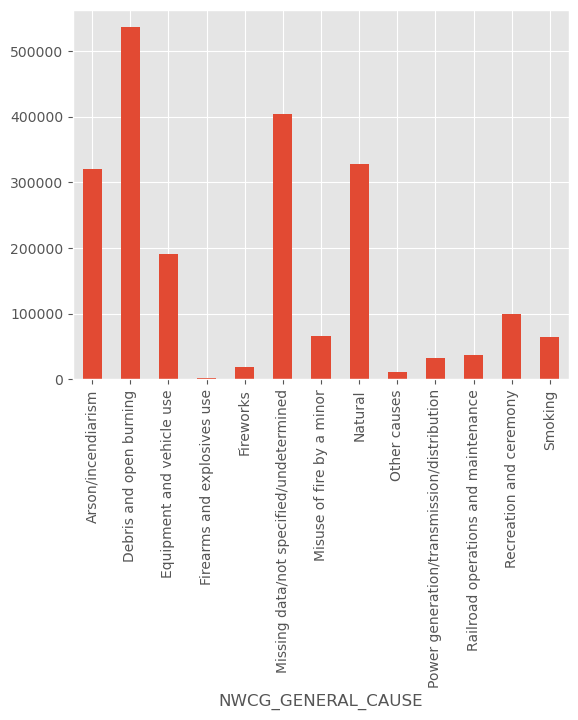

In [191]:
# us_wild_fire_df.groupby(['NWCG_CAUSE_CLASSIFICATION']).size().plot(kind='bar')
us_wild_fire_df.groupby(['NWCG_GENERAL_CAUSE']).size().plot(kind='bar')

<Axes: xlabel='NWCG_CAUSE_CLASSIFICATION'>

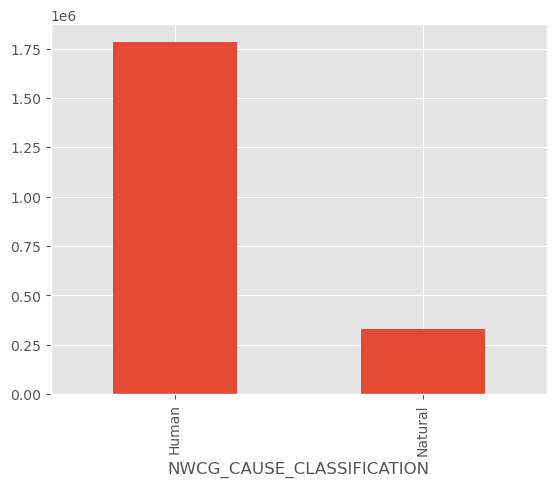

In [192]:
us_wild_fire_df.groupby(['NWCG_CAUSE_CLASSIFICATION']).size().plot(kind='bar')

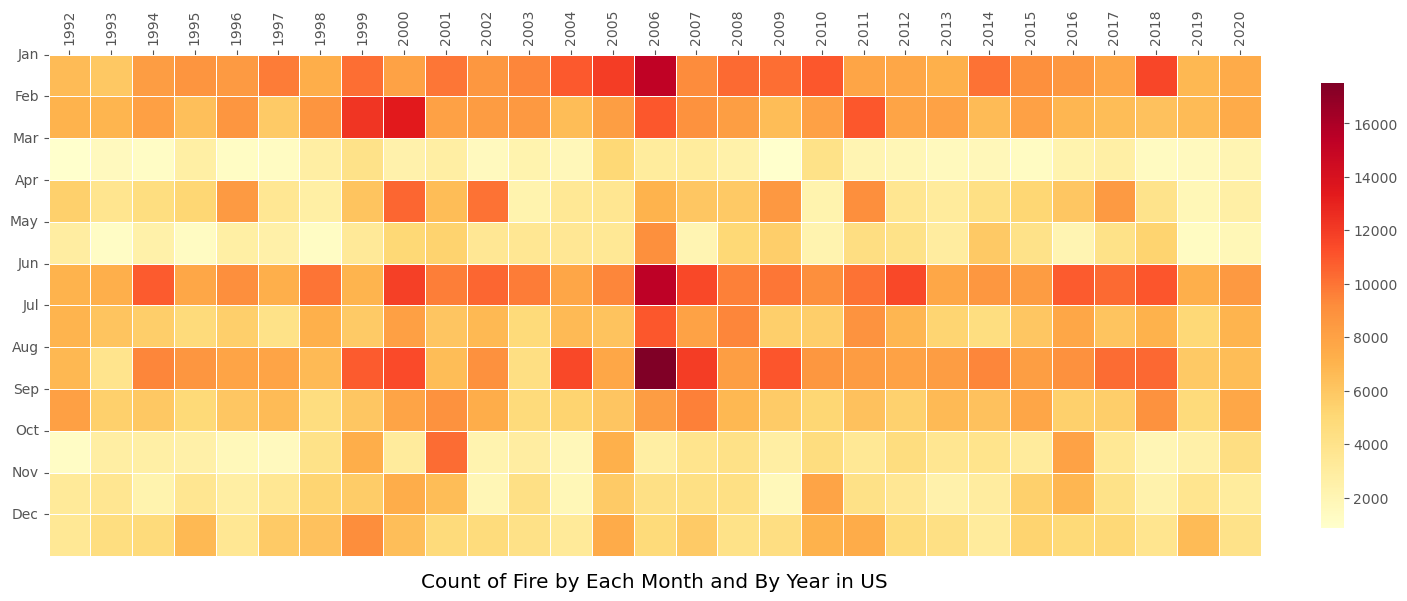

In [193]:
# Need the count of fire by each month and by each state to display a heat map to see which month and which state has highest fire

wild_fire_by_month = us_wild_fire_df.groupby(['FIRE_START_MONTH', 'FIRE_YEAR']).size().unstack()
yaxis_labelvalue = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# plot the result
fig, ax = plt.subplots(figsize=(14, 6),constrained_layout=True )
ax.set_title('Count of Fire by Each Month and By Year in US', y=0, pad=-25, verticalalignment="bottom")

sns.heatmap(wild_fire_by_month, cmap='YlOrRd',linewidths=.5, linecolor='white',square=True,cbar_kws={"shrink": 0.8})
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.yticks(np.arange(0,12),labels=yaxis_labelvalue, rotation=0)
plt.xlabel('')
plt.ylabel('')
plt.savefig('Images/Countof_FireEvents_ByMonth_and_Year.png', format='png', dpi=200)
plt.show()

## ML Data Model Implementation and Analysis

In [194]:
us_wild_fire_df_query = us_wild_fire_df.query("FIRE_YEAR in (2016,2017,2018,2019,2020)")
print(len(us_wild_fire_df_query))

us_wild_fire_fiveyear_df = us_wild_fire_df_query.copy()

us_wild_fire_fiveyear_df.head(4)

345075


,FOD_ID,SOURCE_SYSTEM_TYPE,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIRE_START_MONTH
1879090,400000001,FED,GROUSE CREEK,2016,8/19/2016,Natural,Natural,8/20/2016,0.1,A,45.750000,-113.086389,MT,Aug
1879091,400000002,FED,SHEEP CREEK,2016,8/19/2016,Natural,Natural,8/22/2016,0.5,B,45.681389,-113.003333,MT,Aug
1879092,400000003,FED,HAMBY,2016,7/4/2016,Natural,Natural,7/16/2016,0.1,A,45.259444,-113.645278,MT,Jul
1879093,400000004,FED,EAST FORK,2016,8/2/2016,Natural,Natural,8/5/2016,4.1,B,45.936667,-113.207778,MT,Aug


In [195]:
# Creating fire occurance Dataframe
fire_occurance_df = pd.DataFrame(us_wild_fire_fiveyear_df.groupby(['FIRE_YEAR', 'FIRE_START_MONTH', 'STATE']).agg({'LATITUDE': 'mean', 'LONGITUDE': 'mean', 'FIRE_YEAR': 'count'}))
fire_occurance_df = fire_occurance_df.rename(columns={'LATITUDE': 'Lat', 'LONGITUDE': 'Lon', 'FIRE_YEAR': 'Fire_Occurrence'}).reset_index().rename(columns= {'FIRE_YEAR': 'Year', 'FIRE_START_MONTH': 'Month', 'STATE': 'State'})
fire_occurance_df


,Year,Month,State,Lat,Lon,Fire_Occurrence
0,2016,Apr,AK,62.094364,-149.200662,73
1,2016,Apr,AL,32.805590,-86.748379,112
2,2016,Apr,AR,35.154621,-92.799669,146
3,2016,Apr,AZ,33.921319,-111.277469,118
4,2016,Apr,CA,37.084209,-120.216139,292
...,...,...,...,...,...,...
2831,2020,Sep,VT,43.991467,-72.292950,12
2832,2020,Sep,WA,47.521044,-120.116945,216
2833,2020,Sep,WI,44.358402,-89.733384,33
2834,2020,Sep,WV,38.730476,-79.870606,4


In [196]:
# cds_climate_data
cds_climate_ds = xr.open_dataset('fiveyear_climatedata_3.nc')
cds_climate_ds

<xarray.Dataset>
Dimensions:    (longitude: 232, latitude: 100, time: 60)
Coordinates:
  * longitude  (longitude) float32 -124.8 -124.6 -124.3 ... -67.59 -67.34 -67.09
  * latitude   (latitude) float32 49.14 48.89 48.64 48.39 ... 24.89 24.64 24.39
  * time       (time) datetime64[ns] 2016-01-01 2016-02-01 ... 2020-12-01
Data variables:
    si10       (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    cvh        (time, latitude, longitude) float32 ...
    cvl        (time, latitude, longitude) float32 ...
    pev        (time, latitude, longitude) float32 ...
    sf         (time, latitude, longitude) float32 ...
    slt        (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
    tcrw       (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-13 04:34:19 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [197]:
#get the column names from the dataset to a list 
col = list(cds_climate_ds.data_vars)
# col = ['si10', 't2m', 'cvh', 'cvl', 'pev', 'sf', 'slt', 'tcc', 'tcrw', 'tp']
col

['si10', 't2m', 'cvh', 'cvl', 'pev', 'sf', 'slt', 'tcc', 'tcrw', 'tp']

In [198]:
import numpy as np

# 'si10:10m_wind_speed', 't2m:2m_temperature', 'cvh:high_vegetation_cover',
# 'cvl:low_vegetation_cover', 'pev:potential_evaporation', 'sf:snowfall',
# 'slt:soil_type', 'tcc:total_cloud_cover', 'tcrw:total_column_rain_water',
# 'tp:total_precipitation',

# Define unit conversions
unit_conversion = {
    "si10": [3.6 * 0.621371, 0], # converting to meter speed
    "t2m": [10000, 1], # converting to * c
    "cvh": [100, 0],  # converting index (0 to 1) to percentage
    "cvl": [100, 0],   # converting index (0 to 1) to percentage
    "pev": [1000 * 30, 0], # Converting from meter to millimeter
    "sf": [39.3701, 0],    # Convert from meters to inches
    "slt": [1000, 0],   # unknown
    "tcc": [100, 0],   # converting index (0 to 1) to percentage
    "tcrw": [1000 * 25.4, 0],  # converting Kg m**-2 to inches
    "tp": [1000 * 30, 0],  # convert default units to mm and °C -->[*multiply, +add]
}
# Create latitude and longitude index arrays for efficient indexing
lat_indices = np.zeros(fire_occurance_df.shape[0], dtype=int)
lon_indices = np.zeros(fire_occurance_df.shape[0], dtype=int)

In [199]:
for i, (lat, lon) in enumerate(zip(fire_occurance_df['Lat'], fire_occurance_df['Lon'])):
    lat_indices[i] = (np.abs(cds_climate_ds.latitude - lat)).argmin()
    lon_indices[i] = (np.abs(cds_climate_ds.longitude - lon)).argmin()

In [200]:
# Loop through each variable in the list
for col_name in col:    
    # Extract the specific DataArray from the Dataset
    data_by_col = cds_climate_ds[col_name]
    # Extract climate data values from the DataArray using NumPy
    lat_lon_calc_climate_data_ar = data_by_col.isel(latitude=lat_indices, longitude=lon_indices).mean(dim='time').values

# Calculate the climate data adjusted using unit conversion for the current batch
climate_data_mesurement_conv_ar = np.zeros_like(lat_lon_calc_climate_data_ar)
for i, col_name in enumerate(col):
    conversion_factor = unit_conversion[col_name]
    climate_data_mesurement_conv_ar[:, i] = lat_lon_calc_climate_data_ar[:, i] * conversion_factor[0] + conversion_factor[1]

print("Shape of adjusted_climate_data:", climate_data_mesurement_conv_ar.shape)

Shape of adjusted_climate_data: (2836, 2836)


In [201]:
# Assign adjusted climate data to columns in fire_occurance_df
for i, col_name in enumerate(col):
    
    fire_occurance_df[col_name] = climate_data_mesurement_conv_ar[:, i]
    # fire_occurance_df[col_name] = climate_data_mesurement_conv[:, i]

fire_occurance_df

,Year,Month,State,Lat,Lon,Fire_Occurrence,si10,t2m,cvh,cvl,pev,sf,slt,tcc,tcrw,tp
0,2016,Apr,AK,62.094364,-149.200662,73,0.014556,22.749092,0.225129,0.118303,76.486076,0.046524,3.184337,0.298113,78.251335,75.764763
1,2016,Apr,AL,32.805590,-86.748379,112,0.001668,39.524174,0.402604,0.072635,15.116583,0.070387,4.794741,0.634045,148.984955,90.384155
2,2016,Apr,AR,35.154621,-92.799669,146,0.002011,42.544037,0.377215,0.098616,32.771183,0.038906,5.876872,0.424275,117.709854,108.686539
3,2016,Apr,AZ,33.921319,-111.277469,118,0.001875,39.345734,0.408125,0.123836,22.593199,0.032110,5.201278,0.495765,185.841919,96.955994
4,2016,Apr,CA,37.084209,-120.216139,292,0.002526,41.127106,0.350940,0.049878,38.946751,0.037617,6.674779,0.365643,88.750298,123.871414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,2020,Sep,VT,43.991467,-72.292950,12,0.008261,30.138578,0.296474,0.210512,38.328056,0.050658,3.255714,0.321125,104.689308,94.054779
2832,2020,Sep,WA,47.521044,-120.116945,216,0.011622,28.070423,0.223468,0.123117,56.173885,0.048558,3.491357,0.315793,82.820335,76.154747
2833,2020,Sep,WI,44.358402,-89.733384,33,0.007951,29.729893,0.289740,0.222763,51.131798,0.053453,3.479398,0.299303,90.391106,91.521599
2834,2020,Sep,WV,38.730476,-79.870606,4,0.003537,38.114021,0.299399,0.080089,129.233932,0.043603,4.037885,0.339936,93.125824,119.441536


## ML Random forest - Which feature contributed to more number of fire occurances vs less number of fire occurance

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Preparing the data
    **--Creating a binary dataframe with climate variables and fire occurance for this model.--**
    **--Approach - obtaining the mean value of each climate variable across us and **--
    **--any values that exceeds 30% of the average value will be considered high(1) and anything below that will be considered low(1)--**

In [203]:
#  finding the mean value fire occurance and climate variables across US
remove_columns = ['Year','Month','State','Lat','Lon','slt','sf']
fire_occurance_df_copy = fire_occurance_df.copy()

# create a copy of dataframe with only required columns
fire_occurance_df_copy = fire_occurance_df_copy.drop(columns=remove_columns)

# create a dict with avg value of each column
avg_value_dict = fire_occurance_df_copy.mean().to_dict()

#Display the average value of each columns
avg_value_dict

{'Fire_Occurrence': 121.67665726375176,
 'si10': 0.0053190370090305805,
 't2m': 35.1838264465332,
 'cvh': 0.31737220287323,
 'cvl': 0.1299021691083908,
 'pev': 48.93699264526367,
 'tcc': 0.37271052598953247,
 'tcrw': 100.92298889160156,
 'tp': 100.66064453125}

In [204]:
# For this analysis anything with more than 30% of average is considered high fire occurance(1) and anything below the is considered low occurance(0)
compare_threshold = 0.5 # 30% 

# Create a dataframe with climate factors as feature variables and more and less occurance as target vector 
feature_analysis_by_rf_df = pd.DataFrame(columns=fire_occurance_df_copy.columns)

#populate the dataframe with binary values
for column_name in feature_analysis_by_rf_df.columns:
    feature_analysis_by_rf_df[column_name] = np.where((fire_occurance_df_copy[column_name] > compare_threshold * avg_value_dict[column_name]),1,0)

feature_analysis_by_rf_df

,Fire_Occurrence,si10,t2m,cvh,cvl,pev,tcc,tcrw,tp
0,1,1,1,1,1,1,1,1,1
1,1,0,1,1,1,0,1,1,1
2,1,0,1,1,1,1,1,1,1
3,1,0,1,1,1,0,1,1,1
4,1,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...
2831,0,1,1,1,1,1,1,1,1
2832,1,1,1,1,1,1,1,1,1
2833,0,1,1,1,1,1,1,1,1
2834,0,1,1,1,1,1,1,1,1


In [205]:
# 'si10:10m_wind_speed', 't2m:2m_temperature', 'cvh:high_vegetation_cover',
# 'cvl:low_vegetation_cover', 'pev:potential_evaporation', 'sf:snowfall',
# 'slt:soil_type', 'tcc:total_cloud_cover', 'tcrw:total_column_rain_water',
# 'tp:total_precipitation',

# rename climate column headers
feature_analysis_by_rf_df = feature_analysis_by_rf_df.rename(columns={'Fire_Occurrence':'fire_more_vs_less',
                                                                       'si10':'10m_wind_speed', 
                                                                       't2m':'2m_temperature',
                                                                       'cvh':'high_vegetation_cover',
                                                                       'cvl':'low_vegetation_cover',
                                                                       'pev':'potential_evaporation',
                                                                    #    'sf':'snowfall',
                                                                    #    'slt':'soil_type',
                                                                       'tcc':'total_cloud_cover',
                                                                       'tcrw':'total_column_rain_water',
                                                                       'tp':'total_precipitation'})

feature_analysis_by_rf_df


,fire_more_vs_less,10m_wind_speed,2m_temperature,high_vegetation_cover,low_vegetation_cover,potential_evaporation,total_cloud_cover,total_column_rain_water,total_precipitation
0,1,1,1,1,1,1,1,1,1
1,1,0,1,1,1,0,1,1,1
2,1,0,1,1,1,1,1,1,1
3,1,0,1,1,1,0,1,1,1
4,1,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...
2831,0,1,1,1,1,1,1,1,1
2832,1,1,1,1,1,1,1,1,1
2833,0,1,1,1,1,1,1,1,1
2834,0,1,1,1,1,1,1,1,1


In [206]:
# Defining features set
X = feature_analysis_by_rf_df.copy()
X.drop("fire_more_vs_less", axis=1, inplace=True)
X.head()

,10m_wind_speed,2m_temperature,high_vegetation_cover,low_vegetation_cover,potential_evaporation,total_cloud_cover,total_column_rain_water,total_precipitation
0,1,1,1,1,1,1,1,1
1,0,1,1,1,0,1,1,1
2,0,1,1,1,1,1,1,1
3,0,1,1,1,0,1,1,1
4,0,1,1,0,1,1,1,1


In [207]:
# Defining target vector
y = feature_analysis_by_rf_df["fire_more_vs_less"].ravel()
y[:12]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0])

In [208]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [209]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [210]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [211]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [212]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=0)

In [213]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [214]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [215]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [216]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,343,62
Actual 1,199,105


Accuracy Score : 0.6318758815232722
Classification Report
              precision    recall  f1-score   support

           0       0.63      0.85      0.72       405
           1       0.63      0.35      0.45       304

    accuracy                           0.63       709
   macro avg       0.63      0.60      0.59       709
weighted avg       0.63      0.63      0.60       709



## Feature Importance

In [217]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.44831481406613205, '10m_wind_speed'),
 (0.2953845039188748, 'potential_evaporation'),
 (0.25630068201499323, 'low_vegetation_cover'),
 (0.0, 'total_precipitation'),
 (0.0, 'total_column_rain_water'),
 (0.0, 'total_cloud_cover'),
 (0.0, 'high_vegetation_cover'),
 (0.0, '2m_temperature')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

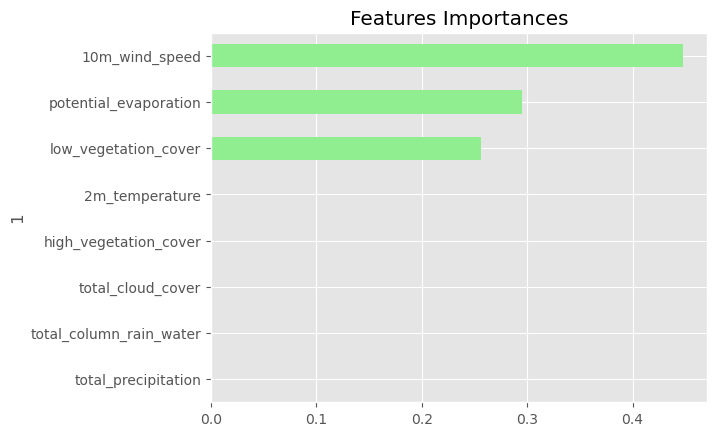

In [218]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

Based on Random state analysis it is observed that the top three key features which contributed to high fire occurances are wind speed, evaporation, and low vegetation cover.

This model has a accuracy of 63% with precision at around 63% and recall at 35% which could potentially mean there is a possiblity of false positive. This could be due to data as each climate factor has various considerations and units all of which is not considered for this analysis.

On overall the model predicts realiable featuers , accuracy, recall and precision percision must be improved either perfomring detailed analysis by zip code or county within each state.

## Predicting the fire occurance using Neural Network

In [219]:
# Import required dependencies
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

#### Step1: Prepare data frame


In [230]:
# Make a copy for fire_occurance_df for this neural network analysis
fire_occurance_nn_df = fire_occurance_df.copy()

# Create a function to convert month from string to numeric
def change_str_to_num(month):
    return datetime.strptime(month, '%b').strftime('%m')

# Apply the function to the 'Month' column
fire_occurance_nn_df['Month'] = pd.to_datetime(fire_occurance_nn_df['Month'], format='%b').dt.strftime('%m')

# Remove state column as it has string value
fire_occurance_nn_df = fire_occurance_nn_df.drop(columns='State')


#Create a bninary dataframe for Neural network analysis
feature_analysis_binary_df = feature_analysis_by_rf_df.copy()

#display the dataframe
print(f'Total records in this dataframe is : {len(feature_analysis_binary_df)}')
feature_analysis_binary_df.head(5)

Total records in this dataframe is : 2836


,fire_more_vs_less,10m_wind_speed,2m_temperature,high_vegetation_cover,low_vegetation_cover,potential_evaporation,total_cloud_cover,total_column_rain_water,total_precipitation
0,1,1,1,1,1,1,1,1,1
1,1,0,1,1,1,0,1,1,1
2,1,0,1,1,1,1,1,1,1
3,1,0,1,1,1,0,1,1,1
4,1,0,1,1,0,1,1,1,1


Other model like Adadelta ,Adding additonal layer decreased the accuracy


In [231]:
# https://www.tutorialspoint.com/keras/keras_model_compilation.htm
from sklearn.preprocessing import LabelEncoder

# # Using Adadelta optimizer, sparse_categorical_crossentropy as loss function, binary accuracy

# Split our preprocessed data into our features and target arrays
X=feature_analysis_binary_df.drop('fire_more_vs_less',axis=1).values
y=feature_analysis_binary_df['fire_more_vs_less'].values

# Split the preprocessed data into a training and testing dataset (80% will be used for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=48,stratify=None)

# Create a MinMaxScaler instances
scaler = MinMaxScaler()

# Fit the MinMaxScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features=len(X_train_scaled[0])
print(f'Number of input features : {input_features}')

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=5,input_dim= input_features, activation='selu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation='selu'))

# thrid hidden layer
nn.add(tf.keras.layers.Dense(units=2, activation='selu'))

# fourth hidden layer
nn.add(tf.keras.layers.Dense(units=2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation='elu'))

# Check the structure of the model
print("The structure of the model is ")
print(nn.summary())

# Compile the model
nn.compile(loss='mean_squared_logarithmic_error', optimizer='Adam', metrics=['accuracy'])


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Train the model
model_output = nn.fit(X_train_scaled, y_train_encoded, epochs=80, batch_size=32, validation_split=0.2)


Number of input features : 8
The structure of the model is 
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_212 (Dense)           (None, 5)                 45        
                                                                 
 dense_213 (Dense)           (None, 5)                 30        
                                                                 
 dense_214 (Dense)           (None, 2)                 12        
                                                                 
 dense_215 (Dense)           (None, 2)                 6         
                                                                 
 dense_216 (Dense)           (None, 1)                 3         
                                                                 
Total params: 96 (384.00 Byte)
Trainable params: 96 (384.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [235]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=0)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.6608812808990479, Accuracy: 0.6161971688270569


In [223]:
# Export our model to HDF5 file
nn.save("models/cf_on_US-wf_predict_msle_Adam_accuracy.h5")

C:\Users\Kinde\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Plot the predicition(train) and observation(test)

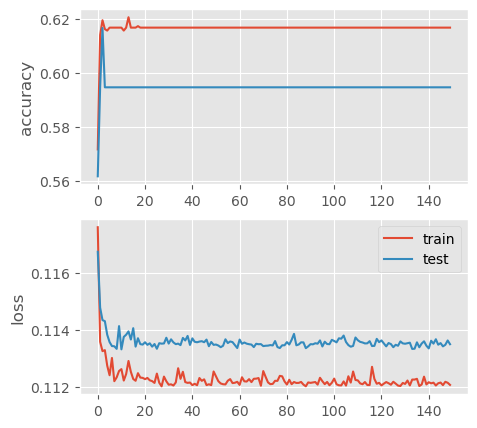

In [239]:
# plotting the model out
fig, ((ax1, ax2)) = plt.subplots(2,figsize=(5, 5))
ax1.plot(model_output.history['accuracy'], label='train')
ax1.plot(model_output.history['val_accuracy'], label='test')
ax1.set(xlabel='', ylabel='accuracy')

ax2.plot(model_output.history['loss'], label='train')
ax2.plot(model_output.history['val_loss'], label='test')
ax2.set(xlabel='', ylabel='loss')

plt.legend()
plt.show()